# Q-learning and SARSA in Deterministic Grid World
For this part we have implented both Q-learning algorithm as well as SARSA for finding optimal action value function.
the parameters used for convergence of both algorithm are as follow: <br>
$$\epsilon = 0.1$$ <br>
$$\alpha = \frac{1}{n(s,a)^{0.8}}$$ <br>
$$\gamma = 0.95$$ 

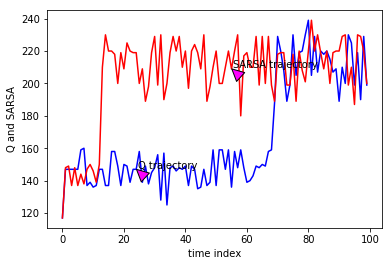

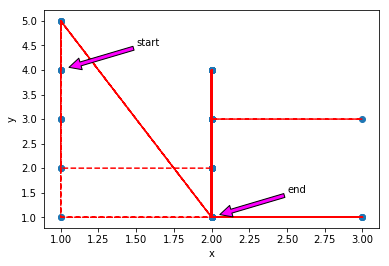

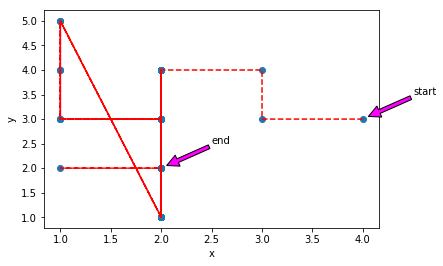

In [5]:
from GridWorld import GridWorld
from Learning import Q
from Learning import SARSA
import numpy as np
from time import sleep
import matplotlib.pyplot as plt

#initialize the environment
env = GridWorld()
#initialize learning module with number of states and action
s = 25
a = 4
Qlearn = Q(s, a)
Slearn = SARSA(s, a)

#set number of episodes and time steps
episode_num = 100
time_horizon = 100

#reward per episode
Qreward_vector = np.zeros(episode_num)
Sreward_vector = np.zeros(episode_num)
#actions taken in time horizon
Qpos_x = np.zeros(time_horizon)
Qpos_y = np.zeros(time_horizon)
Spos_x = np.zeros(time_horizon)
Spos_y = np.zeros(time_horizon)


T = np.zeros(time_horizon)
e = np.zeros(episode_num)

#testing Q learning
for i_episode in range(episode_num):

    #reinitialize environment for new episode
    observation = env.reset()

    for t in range(time_horizon):

        #render the environment graphics
        env.render()

        #choose action based (e-greedy)
        action = Qlearn.greedy(observation)

        #save state before action
        state_old = observation
        #run environment 
        observation, reward = env.step(action, 0)
        #update Q value
        Qlearn.update(action, state_old, observation, reward)

        #accumulate reward for current episode
        Qreward_vector[i_episode] = reward+Qreward_vector[i_episode]

        if i_episode == (episode_num-1):
            Qpos_x[t] = env.position[0]
            Qpos_y[t] = env.position[1]

    e[i_episode] = i_episode

#testing SARSA learning
for i_episode in range(episode_num):

    #reinitialize environment for new episode
    observation = env.reset()
    #choose initial action
    action = Slearn.greedy(observation)

    for t in range(time_horizon):

        #render the environment graphics
        env.render()

        #save state before action
        state_old = observation
        #save action before new action
        action_old = action

        #run environment in deterministic 0 or stochastic mode 1
        observation, reward = env.step(action,0)

        #take new action based on landing state
        action = Slearn.greedy(observation)

        #update Q value
        Slearn.update(action_old, action, state_old, observation, reward)

        #accumulate reward for current episode
        Sreward_vector[i_episode] = reward+Sreward_vector[i_episode]

        if i_episode == (episode_num-1):
            Spos_x[t] = env.position[0]
            Spos_y[t] = env.position[1]

    e[i_episode] = i_episode

env.close()

plt.plot(e, Qreward_vector, 'b')
plt.plot(e, Sreward_vector, 'r')
plt.annotate('Q trajectory', xy=(e[24]+0.05, Qreward_vector[24]+0.05), xytext=(e[24]+0.5, Qreward_vector[24]+0.5), arrowprops=dict(facecolor='magenta', shrink=0.1),)
plt.annotate('SARSA trajectory', xy=(e[55]+0.05, Sreward_vector[55]+0.05), xytext=(e[55]+0.5, Sreward_vector[55]+0.5), arrowprops=dict(facecolor='magenta', shrink=0.1),)
plt.ylabel('Q and SARSA')
plt.xlabel('time index')
plt.show()

fig = plt.subplot()
fig.scatter(Qpos_x, Qpos_y)
plt.plot(Qpos_x, Qpos_y, 'r--')
fig.annotate('start', xy=(Qpos_x[0]+0.05, Qpos_y[0]+0.05), xytext=(Qpos_x[0]+0.5, Qpos_y[0]+0.5), arrowprops=dict(facecolor='magenta', shrink=0.01),)
fig.annotate('end', xy=(Qpos_x[-1]+0.05, Qpos_y[-1]+0.05), xytext=(Qpos_x[-1]+0.5, Qpos_y[-1]+0.5), arrowprops=dict(facecolor='magenta', shrink=0.01),)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

fig = plt.subplot()
fig.scatter(Spos_x, Spos_y)
plt.plot(Spos_x, Spos_y, 'r--')
fig.annotate('start', xy=(Spos_x[0]+0.05, Spos_y[0]+0.05), xytext=(Spos_x[0]+0.5, Spos_y[0]+0.5), arrowprops=dict(facecolor='magenta', shrink=0.01),)
fig.annotate('end', xy=(Spos_x[-1]+0.05, Spos_y[-1]+0.05), xytext=(Spos_x[-1]+0.5, Spos_y[-1]+0.5), arrowprops=dict(facecolor='magenta', shrink=0.01),)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

From the trajectory figures it is obvious that optimal policy is to go to A and then end up in A' and then from A' directly move to A to get 10 points.

# Q-learning and SARSA in Stochastic Grid World
For this part we have implented both Q-learning algorithm as well as SARSA for finding optimal action value function.
the parameters used for convergence of both algorithm are as follow: <br>
$$\epsilon = 0.1$$ <br>
$$\alpha = \frac{1}{n(s,a)^{0.8}}$$ <br>
$$\gamma = 0.95$$ 

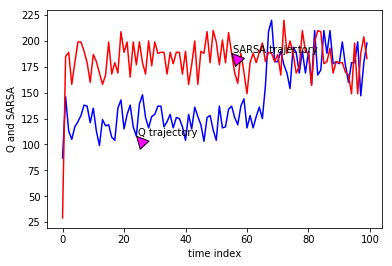

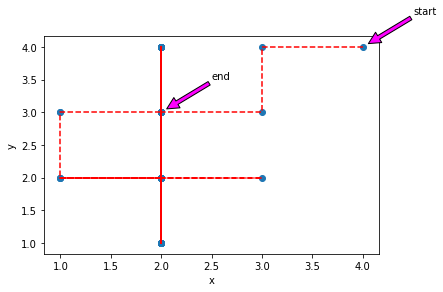

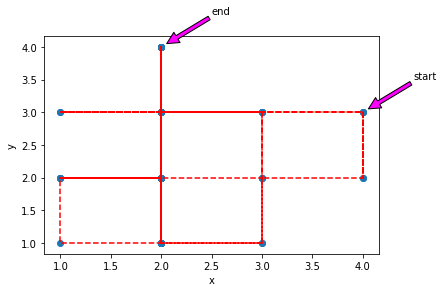

In [2]:
from GridWorld import GridWorld
from Learning import Q
from Learning import SARSA
import numpy as np
from time import sleep
import matplotlib.pyplot as plt

#initialize the environment
env = GridWorld()
#initialize learning module with number of states and action
s = 25
a = 4
Qlearn = Q(s, a)
Slearn = SARSA(s, a)

#set number of episodes and time steps
episode_num = 100
time_horizon = 100

#reward per episode
Qreward_vector = np.zeros(episode_num)
Sreward_vector = np.zeros(episode_num)
#actions taken in time horizon
Qpos_x = np.zeros(time_horizon)
Qpos_y = np.zeros(time_horizon)
Spos_x = np.zeros(time_horizon)
Spos_y = np.zeros(time_horizon)


T = np.zeros(time_horizon)
e = np.zeros(episode_num)

#testing Q learning
for i_episode in range(episode_num):

    #reinitialize environment for new episode
    observation = env.reset()

    for t in range(time_horizon):

        #render the environment graphics
        env.render()

        #choose action based (e-greedy)
        action = Qlearn.greedy(observation)

        #save state before action
        state_old = observation
        #run environment 
        observation, reward = env.step(action, 1)
        #update Q value
        Qlearn.update(action, state_old, observation, reward)

        #accumulate reward for current episode
        Qreward_vector[i_episode] = reward+Qreward_vector[i_episode]

        if i_episode == (episode_num-1):
            Qpos_x[t] = env.position[0]
            Qpos_y[t] = env.position[1]

    e[i_episode] = i_episode

#testing SARSA learning
for i_episode in range(episode_num):

    #reinitialize environment for new episode
    observation = env.reset()
    #choose initial action
    action = Slearn.greedy(observation)

    for t in range(time_horizon):

        #render the environment graphics
        env.render()

        #save state before action
        state_old = observation
        #save action before new action
        action_old = action

        #run environment in deterministic 0 or stochastic mode 1
        observation, reward = env.step(action,1)

        #take new action based on landing state
        action = Slearn.greedy(observation)

        #update Q value
        Slearn.update(action_old, action, state_old, observation, reward)

        #accumulate reward for current episode
        Sreward_vector[i_episode] = reward+Sreward_vector[i_episode]

        if i_episode == (episode_num-1):
            Spos_x[t] = env.position[0]
            Spos_y[t] = env.position[1]

    e[i_episode] = i_episode

env.close()

plt.plot(e, Qreward_vector, 'b')
plt.plot(e, Sreward_vector, 'r')
plt.annotate('Q trajectory', xy=(e[24]+0.05, Qreward_vector[24]+0.05), xytext=(e[24]+0.5, Qreward_vector[24]+0.5), arrowprops=dict(facecolor='magenta', shrink=0.1),)
plt.annotate('SARSA trajectory', xy=(e[55]+0.05, Sreward_vector[55]+0.05), xytext=(e[55]+0.5, Sreward_vector[55]+0.5), arrowprops=dict(facecolor='magenta', shrink=0.1),)
plt.ylabel('Q and SARSA')
plt.xlabel('time index')
plt.show()

fig = plt.subplot()
fig.scatter(Qpos_x, Qpos_y)
plt.plot(Qpos_x, Qpos_y, 'r--')
fig.annotate('start', xy=(Qpos_x[0]+0.05, Qpos_y[0]+0.05), xytext=(Qpos_x[0]+0.5, Qpos_y[0]+0.5), arrowprops=dict(facecolor='magenta', shrink=0.01),)
fig.annotate('end', xy=(Qpos_x[-1]+0.05, Qpos_y[-1]+0.05), xytext=(Qpos_x[-1]+0.5, Qpos_y[-1]+0.5), arrowprops=dict(facecolor='magenta', shrink=0.01),)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

fig = plt.subplot()
fig.scatter(Spos_x, Spos_y)
plt.plot(Spos_x, Spos_y, 'r--')
fig.annotate('start', xy=(Spos_x[0]+0.05, Spos_y[0]+0.05), xytext=(Spos_x[0]+0.5, Spos_y[0]+0.5), arrowprops=dict(facecolor='magenta', shrink=0.01),)
fig.annotate('end', xy=(Spos_x[-1]+0.05, Spos_y[-1]+0.05), xytext=(Spos_x[-1]+0.5, Spos_y[-1]+0.5), arrowprops=dict(facecolor='magenta', shrink=0.01),)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

From the trajectory figures it is obvious that optimal policy is to go to A and then end up in A' and then from A' directly move to A to get 10 points.